# **CLASE 5**

Manipulación y estadística con Python:

1. Estadística descriptiva
*  Medidas de tendencia central
*  Medidas de dispersión de datos
2. Estadística inferencial
*  Correlación de Pearson
*  Modelo de Regresión Lineal

### **1. Estadística descriptiva**

La estadística descriptiva es la rama de la estadística que se encarga de recolectar, organizar, resumir y presentar un conjunto de datos para describir sus características principales, sin intentar extraer conclusiones que vayan más allá de los datos mismos.

Se dividen en las siguientes categorías para sintetizar la información:

- **Medidas de tendencia central:** Media, mediana y moda
- **Medidas de dispersión de datos:** Varianza y desviación estándar

In [ ]:
import statistics as st

**Media:** Permite encontrar un valor central que represente a todo un conjunto de datos.

In [ ]:
#-- Media con statistics --
datos = [30, 36, 47, 50, 52, 52, 56, 60, 63, 70, 70, 110]
print(st.mean(datos))

#-- Media con función --
def media (valores):
  return sum(valores)/len(valores)

print(media(datos))

58
58.0


**Mediana:** Es el valor más central en un conjunto de valores ordenados. Si se tiene un número par de valores, se promedian los dos valores centrales.

In [ ]:
#-- Mediana con statistics --
print(st.median(datos))


#-- Mediana con función --
def mediana(valores):
    # 1. Ordenar valores de menor a mayor
    datos = sorted(valores)
    n = len(datos) #se obtiene la cantidad de numeros que tiene nuestro conjunto
    # 2. Encontramos el centro de nuestros datos, buscando la posición de en medio.
    centro = n // 2 #se divide en enteros para poder tener el centro
    # 3. Si nuestro conjunto de datos al dividirlo NO da residuo cero entonces:
    if n % 2 != 0:
        # Caso impar: La mediana el valor que quedó en el centro.
        return datos[centro]
    else:
        # Caso PAR: No hay un solo centro, así que promediamos
        # los dos valores centrales.
        return (datos[centro - 1] + datos[centro]) / 2 #Sacamos los datos que están en la posición a la mitad y el que sigue de la mitad

print(mediana(datos))

54.0
54.0


**Moda:** Es el conjunto de valores que se presentan con mayor frecuencia

In [ ]:
#-- Moda con statistics --
print(st.mode(datos)) #si solo queremos un valor
print(st.multimode(datos)) #si queremos imprimir varios valores que se repiten


#-- Moda con función --
def moda(valores):
    # 1. Crear un diccionario para contar las apariciones de cada número)
    conteo = {}
    for v in valores:
        if v in conteo:
            conteo[v] += 1 #recorre el diccionario y si ese número ya se conto se suma 1 en el conteo
        else:
            conteo[v] = 1 #recorre el diccionario y si es la primera vez que aparece un número se suma 1

    # 2. Buscamos cuál fue el número máximo de repeticiones
    max_repeticiones = max(conteo.values())

    # 3. Buscamos el primer número que alcanzó ese máximo
   # Recorremos el diccionario por parejas: k (la llave/número) y v (su conteo)
    for k, v in conteo.items():
        # Si las repeticiones de este número son iguales al máximo...
        if v == max_repeticiones:
            #lo devolvemos y la función termina
            return k

def multimoda(valores):
    conteo = {}
    for v in valores:
        if v in conteo:
            conteo[v] += 1
        else:
            conteo[v] = 1

    max_repeticiones = max(conteo.values())

    multimodas = []
    for k, v in conteo.items():
      #Si las repeticiones de este número son iguales al máximo..
        if v == max_repeticiones:
      #agregamos el número a nuestra lista de ganadores
            multimodas.append(k)

    return multimodas

print(moda(datos))
print(multimoda(datos))


52
[52, 70]
52
[52, 70]


**Varianza:** La varianza es una medida estadística que nos dice qué tan "dispersos" o alejados están los datos respecto a su promedio (media). Se eleva al cuadrado para eliminar los valores negativos.

In [ ]:
#-- Varianza (de una muestra) con statistics --
print(st.variance(datos))


#-- Varianza (de una muestra) con función --
def varianza_muestral(valores):
    #Calcula la media
    media = sum(valores) / len(valores)
    #a) (x - media): Calcula la distancia de cada número respecto al promedio.
    #b) **2: Eleva esa distancia al cuadrado (para eliminar negativos y dar peso a los extremos).
    #c) sum(...): Suma todos esos cuadrados obtenidos.
    #d) / (len(valores) - 1): Divide entre el total de datos menos uno (ajuste para muestras).
    varianza = sum((x - media)**2 for x in valores) / (len(valores) - 1)

    return varianza

print(varianza_muestral(datos))


413.6363636363636
413.6363636363636


In [ ]:
#-- Varianza (de una población) con statistics --
print(st.pvariance(datos))

#-- Varianza (de una población) con función --
def varianza_poblacional(valores):
    media = sum(valores) / len(valores)
    varianza = sum((x - media)**2 for x in valores) / len(valores) #no se resta 1

    return varianza

print(varianza_poblacional(datos))

379.1666666666667
379.1666666666667


**Desviación estándar:** La desviación estándar es una medida que indica qué tan dispersos están los datos con respecto a su media aritmética. Es lo mismo que la varianza pero deja los datos en su valor original eliminando la elevación al cuadrado.

In [ ]:
from math import sqrt

In [ ]:
# -- Desviación Estándar (de una muestra) con statistics --
print(st.stdev(datos))

# --- Desviación Estándar (de una muestra) con función ---
def desviacion_estandar_muestral(valores):
    media = sum(valores) / len(valores)
    varianza = sum((x - media)**2 for x in valores) / (len(valores) - 1)
    #Sacamos la raíz cuadrada para obtener la desviación estándar
    desviacion = sqrt(varianza)

    return desviacion

print(desviacion_estandar_muestral(datos))

20.338052110179177
20.338052110179177


In [ ]:
# -- Desviación Estándar (de una población) con statistics --
print(st.pstdev(datos))

# --- Desviación Estándar (de una muestra) con función ---
def desviacion_estandar_muestral(valores):
    media = sum(valores) / len(valores)
    varianza = sum((x - media)**2 for x in valores) / (len(valores))
    desviacion = sqrt(varianza)

    return desviacion

print(desviacion_estandar_muestral(datos))

19.47220240924654
19.47220240924654


### **2. Estadística inferencial**

La estadística inferencial es la rama de la estadística que busca sacar conclusiones generales para toda una población a partir del estudio de una muestra más pequeña.

Si la estadística descriptiva se encarga de "resumir" lo que tienes delante, la inferencial se encarga de "adivinar" o proyectar lo que no puedes ver.

### **2.1. Correlación y regresión lineal simple**

### **Correlación:**
Es una medida estadística que indica la fuerza y la dirección de la relación entre dos variables. Nos dice qué tanto "se mueven juntas" dos cosas.

Para calcular el coeficiente de correlación ($r$), comparamos la variación conjunta de las variables (covarianza) contra su variación individual:

$$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}$$



* **Numerador:** Si es positivo, las variables crecen juntas. Si es negativo, una sube y la otra baja.
* **Denominador:** Normaliza el resultado para que siempre esté entre **-1 y 1**.

---

#### **¿Para qué sirve la $r$?**
1.  **Validar Relaciones:** Antes de hacer una regresión, confirmamos si existe un patrón lineal.
2.  **Identificar Dirección:** Saber si la relación es proporcional o inversa.
3.  **Medir Intensidad:** Determinar si el patrón es "ruidoso" o muy marcado.

---

#### **Guía de Interpretación**
| Valor de $r$ | Fuerza de la relación | Representación Visual |
| :--- | :--- | :--- |
| **1.0** | Perfecta Positiva | Una línea recta perfecta ascendente. |
| **0.7 a 0.9** | Muy Fuerte | Puntos muy agrupados cerca de la línea. |
| **0.4 a 0.6** | Moderada | Tendencia clara, pero con dispersión notable. |
| **0.1 a 0.3** | Débil | Relación muy difusa, casi parece una nube sin forma. |
| **0.0** | Nula | Caos total; no hay relación lineal. |
| **-1.0** | Perfecta Negativa | Una línea recta perfecta descendente. |


<img src="https://drive.google.com/uc?export=view&id=1buyQa4cBHvAsw6tKSLNL6xV4rwiclPqc" width="600">

**Ejemplo:** Se quiere estudiar la relación entre las horas de sueño de un estudiante y su desempeño académico. En una muestra fabricada se
tienen 10 estudiantes aleatorios.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Esta librería permite aplicar modelos de machine learning
import seaborn as sns

#!pip install squarify #correr esta línea primero en caso de que salga error al correr este primer chunk de código
import squarify  #Permite hacer mapas de árbol

In [2]:
#Creación de datos sintéticos

sueño = np.array([4, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]).reshape(-1,1) #Lo transformamos a una lista de listas en vez de un arrego de Numpy para trabajar con ellas para el modelo de regresión
notas = np.array([50, 55, 62, 65, 87, 75, 82, 76, 88, 92]).reshape(-1,1)
print(sueño)
print(notas)

[[4. ]
 [5. ]
 [5.5]
 [6. ]
 [6.5]
 [7. ]
 [7.5]
 [8. ]
 [8.5]
 [9. ]]
[[50]
 [55]
 [62]
 [65]
 [87]
 [75]
 [82]
 [76]
 [88]
 [92]]


In [3]:
# Creamos el DataFrame para la correlación
df_estudiantes = pd.DataFrame({'sueño': sueño.flatten(), 'notas': notas.flatten()})
print(df_estudiantes)

   sueño  notas
0    4.0     50
1    5.0     55
2    5.5     62
3    6.0     65
4    6.5     87
5    7.0     75
6    7.5     82
7    8.0     76
8    8.5     88
9    9.0     92


In [4]:
# Calculamos la correlación de Pearson (r) usando Pandas
r = df_estudiantes['sueño'].corr(df_estudiantes['notas'])
print(f"El resultado de la correlación de Person es {r.round(5)}, indicando una muy alta correlación entre variables")


El resultado de la correlación de Person es 0.90893, indicando una muy alta correlación entre variables


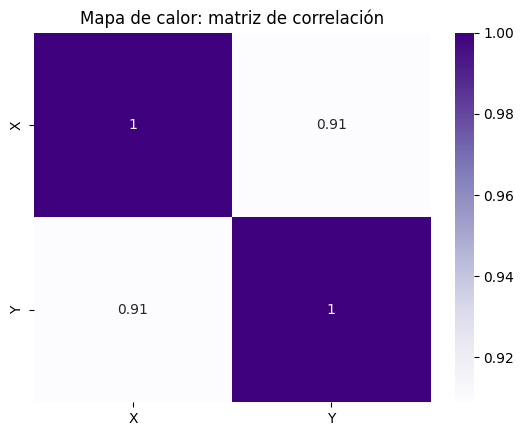

In [12]:
# Creamos un DataFrame (tabla) uniendo las variables 'sueño' y 'notas' para hacer un heatmap
df_xy = pd.DataFrame({"X": sueño.flatten(), "Y": notas.flatten()}) # .flatten() asegura que los datos sean una lista simple (unidimensional)

# Calculamos la matriz de correlación. Por defecto usa el coeficiente de Pearson (valores entre -1 y 1)
corr = df_xy.corr()

# Preparamos el lienzo para el gráfico
plt.figure()

# Creamos el mapa de calor (heatmap) con Seaborn
# annot=True: muestra los números dentro de los cuadros
# cmap="viridis": define la paleta de colores (de morado a amarillo)
sns.heatmap(corr, annot=True, cmap="Purples")

# Añadimos un título y mostramos el gráfico en pantalla
plt.title("Mapa de calor: matriz de correlación")
plt.show()

In [ ]:
#EXTRA: Hacer el modelo de regresión (los pasos para hacerlo se explican mejor en el siguiente ejercicio)

#Entrenamiento del Modelo de Regresión
model = LinearRegression()
model.fit(sueño, notas)

#Obtenemos los coeficientes
print('\nCoeficientes originales')
print('\n',model.coef_) #obtenemos la pendiente (m)
print('\n',model.intercept_) #obtenemos el intercepto (b)

#Arreglamos los resultados
m = model.coef_.flatten() #Los aplanamos para no tener listas de listas y poder utilizar los resultados si lo requerimos
b = model.intercept_.flatten()

#3. Imprimimos nuestros resultados
print('\nCoeficientes después de aplicar flatten')
print("m = {0}".format(m))
print("b = {0}".format(b))
print(f"\nEcuación final: y = {m[0]:.2f}x + {b[0]:.2f}") #Imprimimos los valores en la ecuación final



Coeficientes originales

 [[8.27272727]]

 [17.77272727]

Coeficientes después de aplicar flatten
m = [8.27272727]
b = [17.77272727]

Ecuación final: y = 8.27x + 17.77


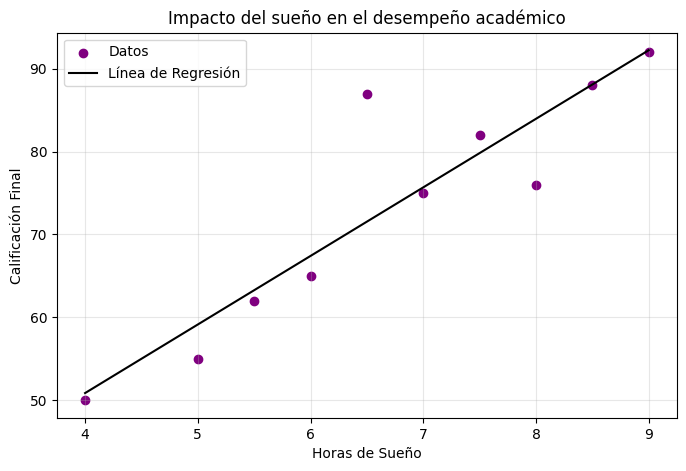

In [ ]:
#Elaboramos el gráfico
plt.figure(figsize=(8, 5))
plt.scatter(sueño, notas, color='purple', label='Datos') # Puntos
plt.plot(sueño, m*sueño + b, color='black', label='Línea de Regresión') # Recta
plt.title('Impacto del sueño en el desempeño académico')
plt.xlabel('Horas de Sueño')
plt.ylabel('Calificación Final')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **Regresión Lineal Simple:**

La **Regresión Lineal** sirve para modelar las relaciones entre una o más variables predictoras o independientes y una variable dependiente o de respuesta. Esta relación se representa como una línea recta (ej. a más horas de trabajo, más dinero ganas de forma constante).

* **El valor de las variables independientes (X):** Es conocido.
* **La variable dependiente (Y):** Es lo que se busca predecir.

Se modela como una función lineal de $x$:

$$y = mx + b$$

Donde $m$ y $b$ son coeficientes de regresión que especifican la **pendiente** y la **intersección** de la recta. En Ciencia de Datos, estos coeficientes suelen verse como **pesos**, por lo tanto, la ecuación se escribe frecuentemente como:

$$y = w_0 + w_1x$$

* **$w_1$ (Pendiente):** Indica cuánto cambia $y$ por cada unidad que aumenta $x$.
* **$w_0$ (Intercepto):** Es el valor de $y$ cuando $x$ es cero.

---

#### **Método de Mínimos Cuadrados**
Estos coeficientes se resuelven mediante el método de **Mínimos Cuadrados**. Este método estima la recta de mejor ajuste como aquella que **minimiza el error** (la distancia al cuadrado) entre los datos reales y los valores estimados por la línea.

#### **a. Cálculo de la Pendiente ($w_1$)**
Esta fórmula mide la relación entre la variación conjunta de $x$ y $y$ frente a la variación individual de $x$:

$$w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

* **Numerador:** Suma de los productos de las distancias de cada punto a sus medias.
* **Denominador:** Suma de los cuadrados de las distancias de $x$ a su media (varianza de $x$).

#### **b. Cálculo del Intercepto ($w_0$)**
Una vez obtenida la pendiente, el intercepto se calcula asegurando que la línea pase por el punto promedio de los datos:

$$w_0 = \bar{y} - w_1\bar{x}$$

### **c. ¿Cómo saber qué tan bueno es el modelo?**

Una manera de medir el error para estimar la "bondad del ajuste" según mínimos cuadrados es a través del **Error (E)** y el **Error Cuadrático Medio ($E_{RMS}$)**.

#### **1. El Error Total (E)**

Representa la suma de todas las distancias al cuadrado entre lo que el modelo predijo y lo que realmente sucedió:

$$E = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

* **$\hat{y}_i$**: Es el valor **pronosticado** (el punto sobre la línea).
* **$y_i$**: Es el valor **real** (el punto que observamos en los datos).
* **Elevado al cuadrado**: Al igual que en la varianza, esto evita que los errores positivos y negativos se cancelen.



#### **2. Error Cuadrático Medio ($E_{RMS}$ o RMSE)**
Es la métrica reina para evaluar modelos. Nos da una idea de la "equivocación promedio" del modelo en las unidades originales de nuestros datos (por ejemplo, pesos o años).

$$E_{RMS} = \left( \frac{\sum_{i=1}^{n} (\hat{y}_i - y_i)^2}{n} \right)^{\frac{1}{2}}$$

> **Nota:** Elevar a la $\frac{1}{2}$ es lo mismo que sacar la **raíz cuadrada**. Lo hacemos para que el error no esté en "unidades al cuadrado" y podamos entenderlo fácilmente.

---

### **¿Por qué "Mínimos Cuadrados"?**
Se llama así porque el algoritmo eleva al cuadrado las diferencias entre los puntos reales y la línea (llamados **residuos**). Al elevarlos al cuadrado, nos aseguramos de que los errores negativos no se cancelen con los positivos y le damos más importancia a los errores grandes, obligando a la línea a pasar lo más cerca posible de todos los puntos.


<img src="https://drive.google.com/uc?export=view&id=1wxS1imBEGbNkw3ANSdnuCu8riKhJTjAu" width="500">

**Ejemplo:** Se quiere estudiar la relación entre la edad de un perro y el
número de veterinarios que ha visitado. En una muestra fabricada se
tienen 10 perros aleatorios.

In [ ]:
#Importamos los datos
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",") #ruta del archivo
print(df)

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23


In [ ]:
# Extraemos la variable dependiente/variable a predecir (visitas)
visitas = df.values[:, -1] #Todas las filas (:) y la última columna(-1)
print(visitas)

# Extraemos las variables independiente/variable de entrada (edad)
edad = df.values[:, :-1] #Todas las filas (:) menos la última columna(-1) para quedarnos con los valores de x
print('\n', edad)


[ 5 10 10 15 14 15 19 18 25 23]

 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
#Al observar lo anterior, las visitas (y)aparecen como una lista y las edades (x) como una lista de listas.
#Por lo tanto, hay que darles la misma forma para poder trabajar con ellas

edad = edad.reshape(-1,1) #Convierte el array en tantas filas como sean necesarias, pero solo 1 columna
visitas=visitas.reshape(-1,1)
print('\n Resultado del reshape para ambas variables')
print('\n   y')
print('\n',visitas)
print('\n   x')
print('\n',edad)


 Resultado del reshape para ambas variables

   y

 [[ 5]
 [10]
 [10]
 [15]
 [14]
 [15]
 [19]
 [18]
 [25]
 [23]]

   x

 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
#Realizamos nuestro modelo

#1. Inicializamos y entrenamos el modelo con nuestros datos en la forma correcta
model=LinearRegression()
model.fit(edad, visitas) #(Variable Independiente, Variable Dependiente)

print('\nCoeficientes originales')
# .coef_ e .intercept_ devuelven los valores dentro de arrays de NumPy (ej. [[1.5]] y [10.0])
print('\n',model.coef_) #obtenemos la pendiente (m)
print('\n',model.intercept_) #obtenemos el intercepto (b)

#2. Arreglamos los resultados que obtuvimos
# La función flatten() convierte una matriz de varias dimensiones [[valor]] en una lista simple [valor]
# Lo hacemos para poder extraer el resultado fácilmente para utilizarlo después si es que se requiere
m=model.coef_.flatten()
b=model.intercept_.flatten()

#3. Imprimimos nuestros resultados
print('\nCoeficientes después de aplicar flatten')
print("m = {0}".format(m))
print("b = {0}".format(b))
print(f"\nEcuación final: y = {m[0]:.2f}x + {b[0]:.2f}") #Imprimimos los valores en la ecuación final


Coeficientes originales

 [[1.93939394]]

 [4.73333333]

Coeficientes después de aplicar flatten
m = [1.93939394]
b = [4.73333333]

Ecuación final: y = 1.94x + 4.73



           x         y
x  1.000000  0.957586
y  0.957586  1.000000


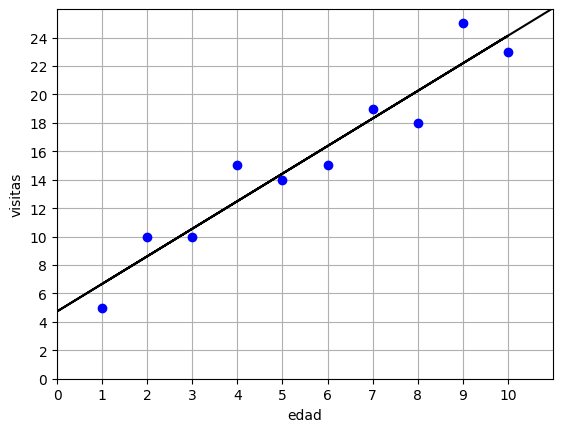

In [ ]:
#Realizamos nuestro gráfico

plt.grid(True)  #Cuadrícula

#Definimos las "marcas" que se verán en los ejes
plt.yticks(range(0, 26, 2))  # En el eje Y: marcas de 2 en 2 (0, 2, 4...)
plt.xticks(range(0, 11, 1))  # En el eje X: marcas de 1 en 1 (0, 1, 2...)

#Forzamos los límites visuales del gráfico (el tamaño de la "ventana")
plt.ylim(0, 26)
plt.xlim(0, 11)

#Etiquetas
plt.xlabel('edad')
plt.ylabel('visitas')

#Hacemos un gráfico de dispersión
plt.plot(edad, visitas, 'o', color='blue')

#Hacemos una línea recta

#   1. Convertimos la columna 'x' a un formato que NumPy entienda (array)
edad2 = df['x'].to_numpy()

#   2. Extendemos el rango de la línea para que cruce todo el gráfico.
#    Al agregar [0, 11], nos aseguramos de que la línea se dibuje desde el origen
#    hasta un poco más allá de nuestros datos actuales.
edad3 = np.append(edad2, [0, 11])

#   3. Dibujamos la ecuación de la recta: y = m*x + b
#   Se calcula el valor de 'y' para cada punto en 'edad3' usando
#   los coeficientes 'm' y 'b' que obtuvimos del modelo.
plt.plot(edad3, m*edad3 + b, color='black')

#Calculamos la correlación para ver qué tan fuerte es la relación lineal
correlacion = df.corr(method='pearson')
print('\n', correlacion)

#Se muestra la gráfica
plt.show()


In [ ]:
#Aquí creamos nuestros propios datos con arreglos de Numpy
visitas = np.array([5, 10, 10, 15, 14, 15, 19, 18, 25, 23])
edad = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#Luego, creamos un DataFrame de Pandas
datos = pd.DataFrame({'visitas': visitas, 'edad': edad}, # Relacionamos la lista de 'visitas' con la de 'edad' en una estructura de filas y columnas.
                     columns=['visitas', 'edad']).itertuples() # .itertuples() nos permite recorrer cada fila de la tabla como si fuera una lista de objetos

print(datos)

In [ ]:
#Calculamos el valor de los residuos, es decir las distancias de cada punto a la recta
#De esta manera podemos calcular el error

#Datos de nuestra recta
m = 1.93939
b= 4.73333
error = 0

#Calculamos los residuos
print('Residuo para cada punto:')
for d in datos: # Recorremos los datos de nuestro dataframe

    #Le damos nuestros datos al modelo
    visitas_reales = d.visitas #Le asignamos a esta variable los valores que tiene visitas
    visitas_predichas = m * d.edad + b  #Aplicamos la fórmula y = mx + b para obtener la predicción del modelo

    #Hacemos el cálculo de residuos el cual nos indica qué tanto se equivocó el modelo en este punto específico
    residuo = visitas_reales - visitas_predichas # El residuo es: (Valor Real - Valor Predicho)
    print(residuo) #Resultado

    residuo_cuadrado = residuo**2 #Elevamos el residuo al cuadrado para:
                                    # 1. Que los errores negativos no se cancelen con los positivos.
                                    # 2. Darle más peso a las equivocaciones grandes.


    error = error + residuo_cuadrado #calculamos la suma de todos estos cuadrados

# Calculamos el Root Mean Squared Error (RMSE) o Error Cuadrático Medio
rms = (error / len(edad))**0.5 #Dividimos la suma de errores entre el número total de datos y sacamos raíz cuadrada
print ('\nError cuadrático medio:', rms) #Resultado

Residuo para cada punto:
-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973

Error cuadrático medio: 1.6762150728501402
